# Анализ рынка автомобилей в Казахстане за период январь-сентябрь 2019

**Цель: провести анализ рынка автомобилей Казахстана**

**Задачи:** 
1. тщательно предобработать данные:  
   * привести данные в столбцах к единобразию  
   * избавиться или исправить некорректные значения  
   * закодировать данные при необходимости (например, страна-производитель);  
2. провести исследовательский анализ данных;   
3. проанализировать рынок автомобилей Казахстана 
4. *провести анализ позиции Меркур Авто: внутренная и внешняя среда (дополнительно)*

**Задания для работы:**
- Анализ рынка (делим на коммерческий и некоммерческий транспорт):
- Емкость рынка автомобилей: в денежном и количественном выражении;
- Марки лидеры на рынке автомобилей;
- Динамика рынка: общая, по сегментам;
- RFM-анализ моделей авто (показатели Frequency и Monetary);
- Продажи автомобилей в разрезе бренд / сегмент;
- Продажи по маркам;
- Продажи по регионам;
- Проверить гипотезу: 
   * стоимость автомобиля зависит от уровня развития
   * региона (средней заработной платы по региону);
- Продажи автоцентров;
- Модели-лидеры на рынке.

*Анализ положения Меркур Авто (дополнительно):*
- Выручка: общая, по маркам, средняя, ежемесячная, ежемесячная по маркам;
- Продажи по регионам: общие, по маркам;
- Конкурентный анализ;
- BCG анализ (анализ продаж по моделям).

**Исполнитель: Шулёв Кирилл</br>
Телеграм: @Sam_harmomy**

В датасете представлены данные о продажах автомобилей на территории Казахстана в январе-сентябре 2019 года всеми
официальными автодилерами, которые собрала статистическая компания-агрегатор.

Данные содержат ошибки и "шум":
* Типы данных в столбцах не соответствуют представленным данным (например, цифры с типом object);
* Проблемы эксель: разделитель десятичной части числа запятая, а не точка;
* Нет единообразия: например, объем двигателя в столбце может быть записан разными способами: 1,5, 1.5, 1.5 л., 1,5 L, 1.5L
* Человеческие ошибки: например, в столбце объем двигателя может быть значение 200 лошадиных сил или объем двигателя 26 вместо 2,6
* Пропуски и другие недочеты.

**Описание данных:**  
- Год продажи
- Месяц продажи (январь - сентябрь)
- Компания – название автоцентра
- Бренд – название продаваемой марки автомобиля
- Модель – название модели автомобиля
- Модификация – модификация модели автомобиля
- Год выпуска – год производства автомобиля
- Страна-производитель – страна, где произведен автомобиль
- Вид топлива – бензин, дизель, электричество, гибрид
- Объём двигателя – объем двигателя автомобиля в литрах
- Коробка передач – оставляем два варианта: автоматическая, механическая(где не механика, ставим автомат)
- Тип привода - оставляем: RWD – задний привод, FWD – передний привод, 4WD – полный привод, 2WD – все остальное
- Сегмент – сегмент, к которому относится авто
- Регион – город продажи
- Наименование дилерского центра – совпадает с компанией
- Тип клиента – юридическое или физическое лицо 
- Форма расчета – наличный и безналичный расчет
- Количество – количество автомобилей в заказе
- Цена, USD – цена автомобиля
- Продажа USD – цена заказа (цена авто умноженная на количество и за вычетом скидок, если есть)
- Область – область/регион, в котором осуществлена продажа
- Сегментация 2013 – сегмент автомобиля актуальный
- Класс 2013 – класс автомобиля актуальный
- Сегментация Eng – английская сегментация
- Локализация производства – удаляем (совпадает со страной производителем)  
  
Признаки-категории:
- сегмент
- класс
- тип привода
- коробка передач

In [1]:
# выгрузим необходимые библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings
from IPython.display import HTML, display
from tabulate import tabulate
import locale

locale.setlocale(locale.LC_TIME, 'ru_RU')
pd.set_option('display.max_columns', 30)
pd.set_option('display.float_format', '{:.2f}'.format) 
warnings.simplefilter(action='ignore')

#настроим стили визуализации
%matplotlib inline
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_style('darkgrid')

In [2]:
# выгружаем данные
df = pd.read_csv('auto_kz_2019.csv', sep=';', decimal = ',')
df.head(5)

,Год,Месяц,Компания,Бренд,Модель,Модификация,Год выпуска,Страна-производитель,Вид топлива,"Объём двиг, л,",Коробка передач,Тип привода,Сегмент,Регион,Наименование дилерского центра,Тип клиента,Форма расчета,Количество,"Цена, USD","Продажа, USD",Область,Сегментация 2013,Класс 2013,Сегментация Eng,Локализация производства
0,2019,Май,Mercur Auto,Audi,A3,TFSI,2018,Германия,Бензин,"1,4",S-tronic,передний,Легковые автомобили Premium,Алматы,Mercur Auto Алматы,Физ. Лицо,безналичный,1.00,28115.00,28115.00,г.Алматы,Легковые автомобили,C класс,C,Импорт
1,2019,Август,Mercur Auto,Audi,A3,TFSI,2018,Германия,Бензин,"1,4",S-tronic,передний,Легковые автомобили Premium,Алматы,Mercur Auto Алматы,Юр. Лицо,наличный,1.00,32246.99,32246.99,г.Алматы,Легковые автомобили,C класс,C,Импорт
2,2019,Апрель,Mercur Auto,Audi,A4,TFSI,2018,Германия,Бензин,"1,4",S-Tronic,FWD,Легковые автомобили Premium,Алматы,Mercur Auto Алматы,Физ. Лицо,безналичный,1.00,32000.00,32000.00,г.Алматы,Легковые автомобили,D класс,D,Импорт
3,2019,Июль,Mercur Auto,Audi,A4,TFSI,2018,Германия,Бензин,"1,4",S-tronic,передний,Легковые автомобили Premium,Алматы,Mercur Auto Алматы,Юр. Лицо,безналичный,1.00,31929.00,31929.00,г.Алматы,Легковые автомобили,D класс,D,Импорт
4,2019,Июль,Mercur Auto,Audi,A4,TFSI,2018,Германия,Бензин,"1,4",S-tronic,передний,Легковые автомобили Premium,Алматы,Mercur Auto Алматы,Физ. Лицо,наличный,1.00,31929.00,31929.00,г.Алматы,Легковые автомобили,D класс,D,Импорт


In [3]:
# запомним размерность исходных данных
shape_dirty = df.shape
print(f'Всего {shape_dirty[0]} наблюдений и {shape_dirty[1]} признаков')

Всего 39966 наблюдений и 25 признаков


## Предобработка данных

In [4]:
# первоначальные названия столбцов
col_names_old = df.columns.to_list()

# новые названия
col_names_new = ['year', 'month', 'company', 'brand', 'model', 'modification', 'release_year', 'country', 
                 'fuel_type','engine_volume', 'transmission_type', 'drive_type', 'segment', 'region', 'dealer', 
                 'client_type', 'payment_type','quantity', 'price_usd', 'sell_price_usd', 'state', 'segment_2013', 
                 'class_2013', 'segment_eng', 'product_localization']

# создадим словарь со старыми и новыми названиями столбцов
col_names_dict = dict(zip(col_names_old, col_names_new))

# переименуем наименования столбцов на английский для удобства в работе
df.columns = col_names_new

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39966 entries, 0 to 39965
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   year                  39966 non-null  int64  
 1   month                 39966 non-null  object 
 2   company               39966 non-null  object 
 3   brand                 39966 non-null  object 
 4   model                 39966 non-null  object 
 5   modification          36375 non-null  object 
 6   release_year          39465 non-null  object 
 7   country               39966 non-null  object 
 8   fuel_type             36826 non-null  object 
 9   engine_volume         35708 non-null  object 
 10  transmission_type     36711 non-null  object 
 11  drive_type            35677 non-null  object 
 12  segment               33205 non-null  object 
 13  region                39966 non-null  object 
 14  dealer                39966 non-null  object 
 15  client_type        

В исходных данных имеются 25 столбцов, для дальнейшего анализа пригодятся не все, поэтому удалим следующие столбцы:
`year` (все данные за 2019 год), `segment` и `segment_eng` (будем использовать укрупнённые значения из `segment_2013`), `region` (оставляем верхнеуровневое поле с областями), `dealer` (по смыслу дублирует информацию из столбца `company`), `payment_type` (слишком много пропусков, данные не восстановить), `product_localization` (по смыслу дублирует столбец `country`)

In [6]:
# удалим лишние столбцы
col_to_del = ['region', 'year', 'segment','segment_eng', 'dealer', 'payment_type', 'product_localization']

df.drop(columns = col_to_del, inplace = True)

df.shape

(39966, 18)

### Обработка значений по столбцам

Рассмотрим каждый столбец детальнее

In [7]:
df.columns

Index(['month', 'company', 'brand', 'model', 'modification', 'release_year',
       'country', 'fuel_type', 'engine_volume', 'transmission_type',
       'drive_type', 'client_type', 'quantity', 'price_usd', 'sell_price_usd',
       'state', 'segment_2013', 'class_2013'],
      dtype='object')

In [8]:
df.month.unique()

array(['Май', 'Август', 'Апрель', 'Июль', 'Февраль', 'Июнь', 'Сентябрь',
       'Январь', 'Март'], dtype=object)

Рассматриваем данные продаж с января по сентябрь 2019 года. Отсутсвует столбец в формате даты, имеются только текстовые обозначения месяцев. Поменяем названия месяцев в дату.

In [9]:
df.month = df.month.apply(lambda x: pd.to_datetime('2019'  + x , format='%Y%B').date())

In [173]:
df.month = pd.to_datetime(df.month)

In [10]:
df.company.unique()

array(['Mercur Auto', 'Автоцентр-Бавария', 'БИПЭК АВТО', 'Вираж',
       'Eurasia Motor Premium', 'Daewoo Bus Kazakhstan', 'Caspian Motors',
       'Каспиан Моторс', 'СемАЗ', 'Astana Motors', 'Astana Motors ',
       'Hyundai Com Trans Kazakhstan ', 'Nissan Manufacturing RUS',
       'СВС-ТРАНС', 'Allur Auto', 'Almaty Motors Premium', 'TERRA MOTORS',
       'ТК КАМАЗ', 'Toyota Motor Kazakhstan', 'Лифан Моторс Рус',
       'MAN Truck & Bus Kazakhstan', 'Автомир ГК', 'Autokapital',
       'Автокапитал', 'ММС Рус', 'MMC RUS', 'Mercur Autos',
       'УзАвто-Казахстан', 'Равон Моторс Казахстан',
       'Ravon Motors Kazakstan', 'Renault Россия', 'Scania Central Asia',
       'Subaru Kazakhstan', 'Volkswagen Group Rus', 'Автодом Motors KST',
       'Автомир-Центр', 'ТОО "Eurasia Motor Zhaik"',
       'Scandinavian Motors', 'Хино Моторс Казахстан', 'Hino Motors '],
      dtype=object)

В столбце с названиями автоцентров есть повторы (название как на кирилице так и на латинице), лишние пробелы: 'Mercur Auto' и 'Mercur Autos', 'Caspian Motors' и 'Каспиан Моторс', 'Astana Motors' и 'Astana Motors ', 'Autokapital' и 'Автокапитал', 'ММС Рус' и 'MMC RUS', 'Равон Моторс Казахстан' и 'Ravon Motors Kazakstan', 'Хино Моторс Казахстан' и 'Hino Motors '. 
Пропишем все названия на латинице.

По имеющимся данным, 'Mercur Auto' и 'Mercur Autos', а также 'Хино Моторс Казахстан' и 'Hino Motors ' - названия одних и те же компаний.

In [11]:
# уберём лишние пробелы в названиях 
df.company = df.company.str.strip()

# переименуем автоцентры
df.company[df.company == 'Mercur Autos'] = 'Mercur Auto'
df.company[df.company == 'Каспиан Моторс'] = 'Caspian Motors'
df.company[df.company == 'Автокапитал'] = 'Autokapital'
df.company[df.company == 'ММС Рус'] = 'MMC RUS'
df.company[df.company == 'Равон Моторс Казахстан'] = 'Ravon Motors Kazakstan'
df.company[df.company == 'Хино Моторс Казахстан'] = 'Hino Motors'

In [12]:
df.brand.unique()

array(['Audi', 'BMW', 'Chevrolet', 'Daewoo', 'Ford', 'Foton', 'GAZ',
       'Hyundai', 'Hyundai Truck & Bus', 'Infiniti', 'Isuzu', 'Iveco',
       'Jac', 'Jaguar', 'KAMAZ', 'Kia', 'Lada', 'Land Rover', 'Lexus',
       'Lifan', 'MAN', 'Mazda', 'Mercedes-Benz', 'Mercedes-Benz Trucks',
       'Mini', 'Mitsubishi', 'Nissan', 'Peugeot', 'Porsche', 'Ravon',
       'Renault', 'Scania', 'Skoda', 'Subaru', 'Toyota', 'UAZ',
       'Volkswagen', 'Volvo', 'Урал', 'Cadillac', 'Shacman', 'Hino',
       'Dong Feng', 'ANKAI', 'Nefaz', 'Yutong'], dtype=object)

Названии марок Hyundai и Mercedes-Benz встречаются по два раза - отдельно выделены автобусы и грузовики, можем "укрупнить" их, в дальнейшем будем проводить анализ в разрезе сегментов.

In [13]:
# используем упрощённые наименования марок для Хёнде и Мерседеса по аналогии с другими марками
df.brand[df.brand == 'Hyundai Truck & Bus'] = 'Hyundai'
df.brand[df.brand == 'Mercedes-Benz Trucks'] = 'Mercedes-Benz'

In [14]:
display(df.model.nunique())
display(df.model.unique())

273

array(['A3', 'A4', 'A6', 'A7', 'A8', 'Q5', 'Q7', '3 серия', '5 серия',
       '6 серия', '7 серия', 'X1', 'X3', 'X4', 'X5', 'X6', 'X7', 'Z4',
       'Aveo', 'Captiva', 'Niva', 'Tahoe', 'Tracker', 'BS 106 A',
       'Fiesta', 'Mondeo', 'BJ3253DMPKB-AD', '2217', '2310', '2705',
       '2752', '3221', '3302', '3308', '3309', 'Next', 'Accent', 'Creta',
       'Elantra', 'Santa Fe', 'Sonata', 'TQ-1/H-1', 'County', 'H350',
       'HD 160', 'HD 170', 'HD 65', 'HD 78', 'Universe', 'Tucson', 'Q50',
       'QX50', 'QX60', 'QX80', 'D-MAX', 'NMR', 'NPR', 'Daily', 'Daily A',
       'Daily V', 'Stralis', 'Tipper', 'S3', 'S5', 'F-Pace', 'F-Type',
       'XE', 'XF', 'XJ', '4308', '4311', '43118', '43253', '43502',
       '44108', '45142', '45143', '53215', '53504', '53605', '54115',
       '5490', '65111', '65115', '65116', '65117', '6520', '65206',
       '65225', '66052', '6606', 'Cerato', 'Optima', 'Picanto', 'Quoris',
       'Rio', 'Sorento', 'Soul', 'Sportage', '4x4', 'Granta', 'Kalina',
       '

Всего имеется 273 уникальных названия моделей автомобилей. Явных ошибок в данных не наблюдается.

In [15]:
#Поменяем тип столбца с годом производства
df.release_year.unique()

#Исправим 2\xa0018', '2\xa0019'
df.release_year = df.release_year.str.replace('\xa0', '')

# Преобразуем типы данных для столбца release_year к int 
df.release_year = df.release_year.astype('float').astype('Int32')

In [16]:
df.country.unique()

array(['Германия', 'США', 'Австрия', 'Республика Казахстан',
       'Российская Федерация', 'Корея', 'Япония', 'Таиланд', 'Китай',
       'UK', 'Узбекистан', 'Венгрия', 'Турция', 'Испания', 'Нидерланды',
       'Польша', 'Швеция', 'Белоруссия', 'Бельгия'], dtype=object)

В столбце с названиям стран-производителей ошибок нет.  
Для оптимизации закодируем названия стран в формат [Alpha3](https://www.artlebedev.ru/country-list/)

In [17]:
# Делаем датасет с кодами стран с сайта Лебедева,переименуем столбцы на английский язык для удобства

countries_codes = pd.read_html('https://www.artlebedev.ru/country-list/', encoding='utf8')[0] \
                [['Наименование', 'Полное наименование', 'Alpha3']] \
                .rename(columns={'Наименование':'name', 'Полное наименование':'full_name'})

countries_codes

,name,full_name,Alpha3
0,Абхазия,Республика Абхазия,ABH
1,Австралия,NaN,AUS
2,Австрия,Австрийская Республика,AUT
3,Азербайджан,Республика Азербайджан,AZE
4,Албания,Республика Албания,ALB
...,...,...,...
246,Южная Джорджия и Южные Сандвичевы острова,NaN,SGS
247,Южная Осетия,Республика Южная Осетия,OST
248,Южный Судан,NaN,SSD
249,Ямайка,NaN,JAM


In [18]:
# Создаем словарь для замены названий стран на коды Alpha3. Ключи - названия стран,значения - коды

countries_codes_dict = {}
for i in range(len(countries_codes)):
    if countries_codes.loc[i]['name'] not in countries_codes_dict:
        countries_codes_dict[countries_codes.loc[i]['name']] = countries_codes.loc[i]['Alpha3']
    if countries_codes.loc[i]['full_name'] not in countries_codes_dict:
        countries_codes_dict[countries_codes.loc[i]['full_name']] = countries_codes.loc[i]['Alpha3']

In [19]:
# Производим замену по словарю
df.country = df.country.apply(lambda x: countries_codes_dict.get(x, x))
df.country.unique()

array(['DEU', 'США', 'AUT', 'KAZ', 'RUS', 'Корея', 'JPN', 'THA', 'CHN',
       'UK', 'UZB', 'HUN', 'TUR', 'ESP', 'NLD', 'POL', 'SWE',
       'Белоруссия', 'BEL'], dtype=object)

In [20]:
# зашифруем оставшиеся названия вручную
df.country = df.country.str.replace('США', 'USA')
df.country = df.country.str.replace('Корея', 'KOR')
df.country = df.country.str.replace('Белоруссия', 'BLR')

In [21]:
df.fuel_type.unique()

array(['Бензин', 'Дизель', nan, 'дизель ', 'бензин ', 'гибрид', '2',
       '1,6', '0', 'Электро', 'Электричество'], dtype=object)

В столбце вида топлива есть повторы, приведём значения к единому виду: F - 'бензин', D -'дизель', H - 'гибрид', E - 'электро'.  
Также в столбце имеются странные значения: '2', '1,6', '0' - их надо рассмотреть детальнее

In [22]:
# уберём лишние пробелы
df.fuel_type = df.fuel_type.str.strip()

# приведём названия к одному виду
df.fuel_type[df.fuel_type.isin(['Бензин', 'бензин'])] = 'F'
df.fuel_type[df.fuel_type.isin(['Дизель', 'дизель'])] = 'D'
df.fuel_type[df.fuel_type.isin(['Электро', 'Электричество'])] = 'E'
df.fuel_type[df.fuel_type == 'гибрид'] = 'H'                    

In [23]:
# Посмотрим на оставшиеся значения внимательнее
df[(df.fuel_type == '2') | (df.fuel_type == '1,6') | (df.fuel_type == '0')]

,month,company,brand,model,modification,release_year,country,fuel_type,engine_volume,transmission_type,drive_type,client_type,quantity,price_usd,sell_price_usd,state,segment_2013,class_2013
23723,2019-01-01,Renault Россия,Renault,Duster,E2GB4AG,2019,RUS,2,MT,4WD,4WD,NaN,1.00,12249.61,12249.61,Западно-Казахстанская область,Внедорожники,Субкомпактные SUV
23724,2019-01-01,Renault Россия,Renault,Duster,E2GB4AGA,2018,RUS,2,AT,4WD,4WD,NaN,1.00,12249.61,12249.61,г.Нур-Султан,Внедорожники,Субкомпактные SUV
23725,2019-01-01,Renault Россия,Renault,Duster,E2GB4AGA,2018,RUS,2,AT,4WD,4WD,NaN,1.00,12249.61,12249.61,г.Нур-Султан,Внедорожники,Субкомпактные SUV
23726,2019-01-01,Renault Россия,Renault,Duster,E2GB4AGA,2018,RUS,2,AT,4WD,4WD,NaN,1.00,12249.61,12249.61,Кызылординская область,Внедорожники,Субкомпактные SUV
23727,2019-01-01,Renault Россия,Renault,Duster,E2GB4AG,2018,RUS,2,MT,4WD,4WD,NaN,1.00,12249.61,12249.61,Карагандинская область,Внедорожники,Субкомпактные SUV
23728,2019-01-01,Renault Россия,Renault,Duster,E1FB4JA,2018,RUS,"1,6",MT,4WD,4WD,NaN,1.00,12249.61,12249.61,Карагандинская область,Внедорожники,Субкомпактные SUV
23729,2019-01-01,Renault Россия,Renault,Duster,E1FB4AGA,2018,RUS,2,AT,4WD,4WD,NaN,1.00,12249.61,12249.61,Карагандинская область,Внедорожники,Субкомпактные SUV
23730,2019-01-01,Renault Россия,Renault,Duster,E1FB4AGA,2018,RUS,2,AT,4WD,4WD,NaN,1.00,12249.61,12249.61,Карагандинская область,Внедорожники,Субкомпактные SUV
23731,2019-01-01,Renault Россия,Renault,Duster,E1FB4AG,2018,RUS,2,MT,4WD,4WD,NaN,1.00,12249.61,12249.61,Карагандинская область,Внедорожники,Субкомпактные SUV
23732,2019-01-01,Renault Россия,Renault,Duster,E1FB4AG,2018,RUS,2,MT,4WD,4WD,NaN,1.00,12249.61,12249.61,Карагандинская область,Внедорожники,Субкомпактные SUV


Типы двигателя '2' и '1,6' относятся к Renault Duster и Renault Sandero, судя по всему данные съехали по столбцам: в fuel_type указаны значения столбца engine_volume, в нём же указаны значения столбца transmission_type, а он в свою очередь содержит данные столбца drive_type.  
[Ссылка на характеристики Дастера](https://www.drom.ru/catalog/renault/duster/2018/)  
[Ссылка на характеристики Сандеро](https://www.drom.ru/catalog/renault/sandero/g_2012_2258/)  

Относительно значения '0', оно есть только у машины UAZ 3741 2018 г.в., похоже на пропуск, данные можно заполнить вручную.  
[Ссылка на характеристики Уаза](https://www.uazcenter-spb.ru/kommercheskie_avtomobili_uaz/klassicheskiy_kommercheskiy_ryad/klassicheskie_passajirskie/uaz_buhanka__furgon_3741/features)

In [24]:
# укажем для УАЗа бензиновый тип двигателя
df.fuel_type[df.fuel_type == '0'] = 'F'

In [25]:
# По данным из интернета у Сандеро тип двигателя - бензиновый, объём двигателя составляем 1.6л, коробку передач оставим ручной, 
# тип привода - передний
sandero = df[(df.fuel_type == '1,6') & (df.model == 'Sandero')].copy()
sandero

,month,company,brand,model,modification,release_year,country,fuel_type,engine_volume,transmission_type,drive_type,client_type,quantity,price_usd,sell_price_usd,state,segment_2013,class_2013
24997,2019-01-01,Renault Россия,Renault,Sandero,SXP16PA5RB,2018,RUS,"1,6",0,0,0,NaN,1.00,12476.90,12476.90,Атырауская область,Легковые автомобили,B класс
24998,2019-01-01,Renault Россия,Renault,Sandero,SXP16K5RB,2018,RUS,"1,6",MT,Передний,Передний,NaN,1.00,12476.90,12476.90,Западно-Казахстанская область,Легковые автомобили,B класс
24999,2019-01-01,Renault Россия,Renault,Sandero,SXP16K5RB,2018,RUS,"1,6",MT,Передний,Передний,NaN,1.00,12476.90,12476.90,Западно-Казахстанская область,Легковые автомобили,B класс
25002,2019-01-01,Renault Россия,Renault,Sandero,SUT16PA5RB,2018,RUS,"1,6",0,0,0,NaN,1.00,12476.90,12476.90,Атырауская область,Легковые автомобили,B класс
25023,2019-01-01,Renault Россия,Renault,Sandero,SXP16PA5RB,2018,RUS,"1,6",0,0,0,NaN,1.00,12476.90,12476.90,г.Нур-Султан,Легковые автомобили,B класс


In [26]:
df.fuel_type[df.index.isin(sandero.index)] = 'F'
df.engine_volume[df.index.isin(sandero.index)] = '1.6'
# коробку передач пока заполним пустыми значениями
df.transmission_type[df.index.isin(sandero.index)] = np.nan
#тип привода - передний (FWD)
df.drive_type[df.index.isin(sandero.index)] = 'FWD'

In [27]:
# заменим разделитель в числе 1,6 на точку
df.fuel_type = df.fuel_type.str.replace(',','.')
# отдельно сохраним данные по Рено Дастер
duster = df[(df.fuel_type == '2') | (df.fuel_type == '1.6')].copy()

In [28]:
# сдвинем значения со столбца fuel_type построчно вправо
duster.loc[:,'fuel_type':'transmission_type'] = duster.loc[:,'fuel_type':'transmission_type'].shift(axis=1,fill_value='F')
duster.sample(5)

,month,company,brand,model,modification,release_year,country,fuel_type,engine_volume,transmission_type,drive_type,client_type,quantity,price_usd,sell_price_usd,state,segment_2013,class_2013
23758,2019-01-01,Renault Россия,Renault,Duster,E2PGB4AGA,2018,RUS,F,2,AT,4WD,NaN,1.00,12249.61,12249.61,г.Нур-Султан,Внедорожники,Субкомпактные SUV
23723,2019-01-01,Renault Россия,Renault,Duster,E2GB4AG,2019,RUS,F,2,MT,4WD,NaN,1.00,12249.61,12249.61,Западно-Казахстанская область,Внедорожники,Субкомпактные SUV
23735,2019-01-01,Renault Россия,Renault,Duster,E0DB2JA,2018,RUS,F,1.6,AT,Передний,NaN,1.00,12249.61,12249.61,Карагандинская область,Внедорожники,Субкомпактные SUV
23725,2019-01-01,Renault Россия,Renault,Duster,E2GB4AGA,2018,RUS,F,2,AT,4WD,NaN,1.00,12249.61,12249.61,г.Нур-Султан,Внедорожники,Субкомпактные SUV
23724,2019-01-01,Renault Россия,Renault,Duster,E2GB4AGA,2018,RUS,F,2,AT,4WD,NaN,1.00,12249.61,12249.61,г.Нур-Султан,Внедорожники,Субкомпактные SUV


In [29]:
# заменим исходную таблицу исправленными данными
df[df.index.isin(duster.index)] = duster

In [30]:
# рассмотрим объём двигателя
df.engine_volume.unique()

array(['1,4', '2', '3', '4,4', '6,6', '1,5', '1,596', '2,4', '1,7',
       '26,7', '25,7', '24,7', '23,7', '22,7', '21,7', '20,7', '19,7',
       '18,7', '17,7', '16,7', '15,7', '14,7', '13,7', '12,7', '11,7',
       '10,7', '9,7', '8,7', '7,7', '6,7', '5,7', '4,7', '3,7', '2,7',
       '6,2', '1,4 Turbo', '2,5', '1,6', nan, '2,8', '4,3', '4,3,',
       '1,6 MPI', '2,0 MPI', '2,4 GDI', '2,4 MPI', '2,5 CRDI VGT',
       '2,5 CRDI WGT', '3,9', '7,5', '12,3', '1,6 T-GDI', '2,0 CRDI',
       '2.0', '3,5', '5,6', '5,2', '3,0 L', '1.6', '1.5', '5', '1,598',
       '1,248', '1,998', '2,359', '1,999', '3,342', '1,591', '3,47',
       '1,69', '1,774', '2.5', '2.7 ', '3.5', '2.7', '4.6', '4,6', '5.7',
       '1,8', '10,5', '4', '5,5', '12', '12,8', '11', '2,2', '1,2',
       '1,485', '13', '1,33', '#Н/Д', '4.0', '2.4G', '2,4G', '2.8',
       '2,693', '2,0', '3,8', '3.8', '1,2T', '3,6', '7,6', '4,9', '2.0h',
       '2,9', '400 Л.С.', '4,98 L,', '4,98', '88 KWH', '8,4 L,', '6,7L',
       '6,5'], d

В столбце объём двигателя необходимо: 
- заменить разделители на точки,
- оставить только числа
- привести всё к одной единице измерения - литры
- изменить тип на float

Сперва обработаем строки с '#Н/Д', '400 Л.С.' и '88 KWH', все остальные значения можно обработать одним образом

In [31]:
df[df.engine_volume == '400 Л.С.']

# У Ягуара I-Pace объём двигателя указан в л.с

,month,company,brand,model,modification,release_year,country,fuel_type,engine_volume,transmission_type,drive_type,client_type,quantity,price_usd,sell_price_usd,state,segment_2013,class_2013
39544,2019-02-01,Almaty Motors Premium,Jaguar,I-Pace,ЭЛЕКТРОКАР,2019,UK,E,400 Л.С.,РЕДУКТОР,4WD,Физ. Лицо,1.00,117236.97,117236.97,г.Алматы,Внедорожники,Компактные SUV
39545,2019-04-01,Almaty Motors Premium,Jaguar,I-Pace,ЭЛЕКТРОКАР,2019,UK,E,400 Л.С.,РЕДУКТОР,4WD,Физ. Лицо,1.00,105388.79,105388.79,г.Алматы,Внедорожники,Компактные SUV
39546,2019-06-01,Almaty Motors Premium,Jaguar,I-Pace,ЭЛЕКТРОКАР,2019,UK,E,400 Л.С.,РЕДУКТОР,4WD,Юр. Лицо,1.00,120413.28,120413.28,г.Алматы,Внедорожники,Компактные SUV


In [32]:
# По данным с сайта Авилон: https://avilon.ru/brands/jaguar/i-pace/i/krossover/tehnicheskie-harakteristiki/ - объём двигателя 2л
# Т.к. записи всего три, можем использовать это значение

df.loc[df.engine_volume == '400 Л.С.', 'engine_volume'] = '2'

In [33]:
df[df.engine_volume ==  '88 KWH']

,month,company,brand,model,modification,release_year,country,fuel_type,engine_volume,transmission_type,drive_type,client_type,quantity,price_usd,sell_price_usd,state,segment_2013,class_2013
39818,2019-07-01,Allur Auto,ANKAI,HFF6124G03EV3,Bus,2019,KAZ,E,88 KWH,NaN,2WD,Юр. Лицо,1.00,307986.36,307986.36,Костанайская область,Коммерческие автомобили,Большие автобусы
39819,2019-07-01,Allur Auto,ANKAI,HFF6124G03EV3,Bus,2019,KAZ,E,88 KWH,NaN,2WD,Юр. Лицо,1.00,307986.36,307986.36,Костанайская область,Коммерческие автомобили,Большие автобусы
39820,2019-07-01,Allur Auto,ANKAI,HFF6124G03EV3,Bus,2019,KAZ,E,88 KWH,NaN,2WD,Юр. Лицо,1.00,307986.36,307986.36,Костанайская область,Коммерческие автомобили,Большие автобусы
39821,2019-07-01,Allur Auto,ANKAI,HFF6124G03EV3,Bus,2019,KAZ,E,88 KWH,NaN,2WD,Юр. Лицо,1.00,307986.36,307986.36,Костанайская область,Коммерческие автомобили,Большие автобусы
39822,2019-07-01,Allur Auto,ANKAI,HFF6124G03EV3,Bus,2019,KAZ,E,88 KWH,NaN,2WD,Юр. Лицо,1.00,307986.36,307986.36,Костанайская область,Коммерческие автомобили,Большие автобусы
39823,2019-07-01,Allur Auto,ANKAI,HFF6124G03EV3,Bus,2019,KAZ,E,88 KWH,NaN,2WD,Юр. Лицо,1.00,307986.36,307986.36,Костанайская область,Коммерческие автомобили,Большие автобусы
39824,2019-07-01,Allur Auto,ANKAI,HFF6124G03EV3,Bus,2019,KAZ,E,88 KWH,NaN,2WD,Юр. Лицо,1.00,307986.36,307986.36,Костанайская область,Коммерческие автомобили,Большие автобусы
39825,2019-07-01,Allur Auto,ANKAI,HFF6124G03EV3,Bus,2019,KAZ,E,88 KWH,NaN,2WD,Юр. Лицо,1.00,307986.36,307986.36,Костанайская область,Коммерческие автомобили,Большие автобусы
39826,2019-07-01,Allur Auto,ANKAI,HFF6124G03EV3,Bus,2019,KAZ,E,88 KWH,NaN,2WD,Юр. Лицо,1.00,307986.36,307986.36,Костанайская область,Коммерческие автомобили,Большие автобусы
39827,2019-07-01,Allur Auto,ANKAI,HFF6124G03EV3,Bus,2019,KAZ,E,88 KWH,NaN,2WD,Юр. Лицо,1.00,307986.36,307986.36,Костанайская область,Коммерческие автомобили,Большие автобусы


88 киловат/час - объём двигателя у автобуса Ankai. Заменим его на условное значение - 7.8л (сопоставимо с двигателями других моделей этой марки)  
[Краткая информация о модели](https://ru.ankaiglobal.com/ankai-12m-electric-city-bus_p46.html)

In [34]:
df.loc[df.engine_volume ==  '88 KWH', 'engine_volume'] = '7.8'

In [35]:
df[df.engine_volume == '#Н/Д']
#По двум моделям автомобилей нет данных, возьмём информацию в открытых источниках

,month,company,brand,model,modification,release_year,country,fuel_type,engine_volume,transmission_type,drive_type,client_type,quantity,price_usd,sell_price_usd,state,segment_2013,class_2013
31148,2019-02-01,Toyota Motor Kazakhstan,Toyota,Corolla,7,2019,TUR,F,#Н/Д,#Н/Д,#Н/Д,Физ. Лицо,1.00,42316.46,42316.46,г.Нур-Султан,Легковые автомобили,C класс
31149,2019-02-01,Toyota Motor Kazakhstan,Toyota,Corolla,7,2019,TUR,F,#Н/Д,#Н/Д,#Н/Д,Физ. Лицо,1.00,42316.46,42316.46,г.Нур-Султан,Легковые автомобили,C класс
32670,2019-04-01,Toyota Motor Kazakhstan,Toyota,HILUX DC,JT,2019,THA,F,#Н/Д,#Н/Д,#Н/Д,Юр. Лицо,1.00,30870.28,30870.28,г.Алматы,Пикапы,Pick-ups
33070,2019-07-01,Toyota Motor Kazakhstan,Toyota,HILUX DC,NX,2019,THA,F,#Н/Д,#Н/Д,#Н/Д,Физ. Лицо,1.00,27012.46,27012.46,Атырауская область,Пикапы,Pick-ups


In [36]:
# Corolla: https://www.drom.ru/catalog/toyota/corolla/239313/: двигатель 1.6, КПП - автомат, привод - FWD
df.loc[(df.engine_volume == '#Н/Д') & (df.model == 'Corolla'), 'engine_volume'] = '1.6'
df.loc[(df.transmission_type == '#Н/Д') & (df.model == 'Corolla'), 'transmission_type'] = 'автоматическая'
df.loc[(df.drive_type == '#Н/Д') & (df.model == 'Corolla'), 'drive_type'] = 'FWD'

# Hilux: https://shop.toyotakz.com/ru/used/toyota/hilux_ng?filterOrder=brands;brands;model;models
# двигатель - 2.7, КПП - автомат, привод - 4WD
df.loc[df.engine_volume == '#Н/Д', 'engine_volume'] = '2.7'
df.loc[df.transmission_type == '#Н/Д', 'transmission_type'] = 'автоматическая'
df.loc[df.drive_type == '#Н/Д', 'drive_type'] = '4WD'

In [37]:
# заменим во всём столбце запятые на точки
df.engine_volume = df.engine_volume.str.replace(',','.')

# оставим только числа и разделитель
df.engine_volume = df.engine_volume.apply(lambda x: re.sub(r'[^0-9.]', '', str(x)))

In [38]:
# уберём лишние точки в конце чисел
df.engine_volume = df.engine_volume.str.rstrip('.')

# заменим пустые строки nan
df.loc[df.engine_volume == '', 'engine_volume'] = np.nan

# изменим тип данных
df.engine_volume = df.engine_volume.astype('float')

In [39]:
df.transmission_type.unique()

array(['S-tronic', 'S-Tronic', 'Tiptronic', 'АКПП', 'АКП', 'Steptronic',
       'AT', '6 АТ', '5 МТ', '6АТ', 'MT', '8AT', '5МТ', 'Powershift S6',
       '6AT', nan, 'Мех.', '6 AT', '6 MT', '6MT', '5 AT', '5AT', 'МКПП',
       '7 DCT', '7DCT', '8 AT', 'МТ', 'CVT', 'DCT', '4 АТ', '6 МТ', '6МТ',
       '4АТ', '4AT', '8АТ', '8 АТ', '5MT', 'AMT', 'CVT (вариатор)',
       'CVT (вариATор)', 'CVT(вAриATор)', '7G-TRONIC', '9G-TRONIC',
       '12AT', '12АТ', '5АТ', '7АТ', '7AT', '6M/T', 'PDK', '8-ступ АКПП',
       '8', '8АКПП', '8 АКПП Tiptronic S', '7 АКПП (PDK)', '7 АКПП PDK',
       '8 АКПП (PDK)', 'АТ', 'АT', 'МT', '7 DSG', '7DSG', '6 DSG', '6DSG',
       'автоматическая', 'DSG', '6A', '6А', '5M', 'A/T', 'M/T', 'МКП',
       '5М', 'М/T', ' 7 АКП', '7АКП', 'А/T', '8A', 'TDI', '9AT',
       'РЕДУКТОР'], dtype=object)

В столбце с типом коробки передач оставим только два значения: автоматическая и механическая.  
Все названия вида "МТ", "МКП", "Мех." или "МКПП" и т.д. - механическая (MT), остальные - автоматическая (AT)

In [40]:
# создадим список наименований для обоих видов коробки передач
manual = ['5 МТ', 'MT', '5МТ', 'Мех.', '6 MT', '6MT', 'МКПП', 'МТ', 
          '6 МТ', '6МТ', '5MT', '6M/T', 'МT', 'M/T', 'МКП', '5М', 'М/T', 'механическая']

auto = df.transmission_type[(~df.transmission_type.isin(manual))  & 
          (df.transmission_type.notna())].unique().tolist()

# приведём всё к двум типа
df.transmission_type = df.transmission_type.replace(manual, 'MT')
df.transmission_type = df.transmission_type.replace(auto, 'AT')

In [41]:
df.drive_type.unique()

array(['передний', 'FWD', 'quattro', 'Задний', 'Полный', 'AWD',
       'Передний', '4WD', '4х2.2', nan, 'RWD', '2 WD', '2WD', '4 WD',
       '4X4', '4х4', '4x4', '4x2', '4х2', '4X2', 'Астана',
       'Передний (FF)', '0', 'FF', 'полный', '4Motion'], dtype=object)

Тип двигателя также нужно привести к единому формату: для переднего привода - FWD, для заднего - RWD, для полного - 4WD, остальное - 2WD.  
Астана указана у двух моделей Камаза: 65116 и 45141, они имеют задний и полный привод соответственно([Ссылка 1](https://www.drom.ru/catalog/kamaz/65116/specs/drive_type/), [Ссылка 2](https://www.drom.ru/catalog/kamaz/45141/specs/drive_type/))  
Ноли заменим на nan.

In [42]:
# заполним данные для камазов
df.loc[df.model == '65116', 'drive_type'] = 'RWD'
df.loc[df.model == '45141', 'drive_type'] = '4WD'

In [43]:
# заменим 0 на nan
df.loc[df.drive_type == '0', 'drive_type'] = np.nan

# приведём задний привод к единому виду
df.loc[df.drive_type == 'Задний', 'drive_type'] = 'RWD'
# создадим списки с перечнем названий приводов
fwd = ['передний', 'Передний','Передний (FF)', 'FF']
full = ['quattro', 'Полный', '4 WD', '4X4', '4х4', '4x4', 'полный', '4Motion']
rest = ['AWD', '4х2.2', '2 WD', '2WD', '4x2','4х2', '4X2']

# произведём замену
df.drive_type = df.drive_type.replace(fwd, 'FWD')
df.drive_type = df.drive_type.replace(full, '4WD')
df.drive_type = df.drive_type.replace(rest, '2WD')

In [44]:
display(df.state.unique())

array(['г.Алматы', 'г.Нур-Султан', 'Восточно-Казахстанская область',
       'Западно-Казахстанская область', 'Костанайская область',
       'Павлодарская область', 'Южно-Казахстанская область',
       'Мангистауская область', 'Атырауская область',
       'Актюбинская область', 'Карагандинская область',
       'Северо-Казахстанская область', 'Акмолинская область',
       'Кызылординская область', 'Жамбылская область',
       'Туркестанская область', 'Алматинская область', 'Экспорт область'],
      dtype=object)

In [45]:
df[df.state == 'Экспорт область'].sample(3)

,month,company,brand,model,modification,release_year,country,fuel_type,engine_volume,transmission_type,drive_type,client_type,quantity,price_usd,sell_price_usd,state,segment_2013,class_2013
35703,2019-09-01,Toyota Motor Kazakhstan,Toyota,LC200,MY,2019,JPN,F,4.60,AT,4WD,Физ. Лицо,1.00,70892.85,70892.85,Экспорт область,Внедорожники,Полноразмерные SUV
23525,2019-08-01,Allur Auto,Ravon,Nexia R3,SX,2019,KAZ,F,1.49,MT,FWD,Юр. Лицо,1.00,8348.00,8348.00,Экспорт область,Легковые автомобили,B класс
14958,2019-07-01,Allur Auto,Jac,S5,FL Luxury 2.0 MT5,2018,KAZ,F,2.00,AT,2WD,Юр. Лицо,1.00,15425.37,15425.37,Экспорт область,Внедорожники,Субкомпактные SUV


В столбце область содержится информация о местах продажи автомобилей. Явных ошибок нет.  
Значение "Экспорт область" указано для автомобилей, купленных на территории Казахстана и вывезенные заграницу.

In [46]:
df.client_type.unique()

array(['Физ. Лицо', 'Юр. Лицо', nan, 'Юр.Лицо', 'физ.лицо', 'юридическое',
       'физическое', 'ФизЛицо', 'ЮрЛицо', 'Корп. клиент'], dtype=object)

In [47]:
# Типы клиентов надо обработать, оставим только 'ФЛ' и 'ЮЛ'
df.loc[df.client_type.str.contains('физ', case=False, na=False), 'client_type'] = 'ФЛ'
df.loc[df.client_type.str.contains('юр', case=False, na=False), 'client_type'] = 'ЮЛ'
df.loc[df.client_type == 'Корп. клиент', 'client_type'] = 'ЮЛ'

## Обработка пропусков

In [48]:
# определим долю пропусков в данных
df.isna().mean()*100

month                0.00
company              0.00
brand                0.00
model                0.00
modification         8.99
release_year         1.25
country              0.00
fuel_type            7.86
engine_volume       10.65
transmission_type    8.16
drive_type          10.88
client_type         17.63
quantity             0.02
price_usd            0.00
sell_price_usd       0.00
state                0.00
segment_2013         0.00
class_2013           0.00
dtype: float64

В столбцах с объёмом двигателя, типом привода и типом клиента имеется более 10% пропусков.Попробуем устранить часть из них.  
На пропуски в модификации не обращаем внимание, т.к. не будем использовать это поле для анализа, по имеющимся данным, может быть удастся восстановить пропуски в других столбцах.  
Вручную обрабатывать пропуски долго, поэтому для части данных, где это возможно, заменим пропуски модой.

### Вид топлива

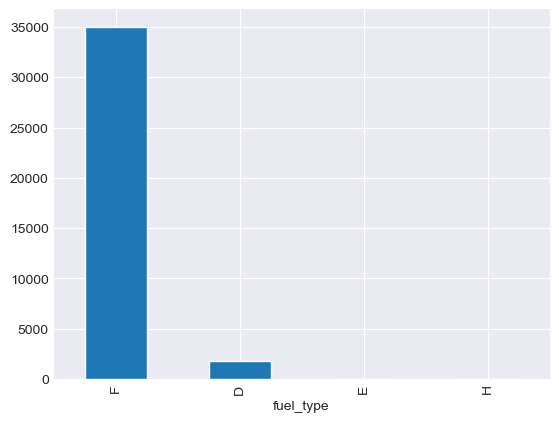

In [49]:
# Посмотрим график распределения видов топлива
df['fuel_type'].value_counts().plot(kind='bar')
plt.show()

In [50]:
# топ моделей с пропусками в разбивке по видам топлива
df[df.model.isin(df[df.fuel_type.isna()].model.value_counts().nlargest(20).index.tolist())].\
groupby('model')['fuel_type'].value_counts()

model     fuel_type
3302      F            870
          D              1
3741      F             37
Duster    F             57
HD 78     D              8
HFF6850G  D            167
N120      D             60
          F             29
Next      F            303
          D             43
Polo      F            517
S3        F            907
S5        F            285
          D              4
Sandero   F              6
Name: count, dtype: int64

По большей части двигатели у автомобилей работают на бензине, можно заполнить пропуски этим значением.

In [51]:
df.fuel_type.fillna('F', inplace = True)

### Объём двигателя

In [52]:
# выведем топ-15 моделей с наибольшим кол-вом пропусков в объеме двигателя
df[df.engine_volume.isna()].model.value_counts().nlargest(15)

model
Duster      650
Sandero     435
Nexia R3    361
Logan       320
65115       259
Kaptur      230
43118       188
S3          175
3302        127
S5          117
6520         74
Next         71
NMR          68
45143        62
Arkana       55
Name: count, dtype: int64

In [53]:
# Сохраним в отдельный список топ моделей по пропускам
engine_nans = df[df.engine_volume.isna()].model.value_counts().nlargest(15).index.tolist()

# смотрим наиболее частые значения объема двигателей у этих моделей
top_engine_volume = df[df.model.isin(engine_nans)].groupby('model')['engine_volume'].value_counts()
top_engine_volume

model     engine_volume
3302      2.70              866
          2.80                3
          4.30                2
Duster    2.00               42
          1.60               15
NMR       3.00               16
          8.70                5
Nexia R3  1.50             1202
          1.49              136
Next      2.70              302
          2.80               30
          4.30               14
S3        1.60             1109
          1.50                2
S5        2.00              330
Sandero   1.60                6
Name: count, dtype: int64

Из этого списка можем заполнить объём двигателя модой для следующих моделей: 3302, Nexia R3, Next, S3, S5.

In [54]:
mask = ['3302', 'Nexia R3', 'Next', 'S3', 'S5']

# функция для заполнения пропусков в объёме двигателя модой
def fill_na_engine_volume(data):
    for i in range(len(mask)):
        col = data.engine_volume[data.model == mask[i]]
        data.engine_volume[data.model == mask[i]] = col.fillna(col.mode()[0])
    return data

fill_na_engine_volume(df)

,month,company,brand,model,modification,release_year,country,fuel_type,engine_volume,transmission_type,drive_type,client_type,quantity,price_usd,sell_price_usd,state,segment_2013,class_2013
0,2019-05-01,Mercur Auto,Audi,A3,TFSI,2018,DEU,F,1.40,AT,FWD,ФЛ,1.00,28115.00,28115.00,г.Алматы,Легковые автомобили,C класс
1,2019-08-01,Mercur Auto,Audi,A3,TFSI,2018,DEU,F,1.40,AT,FWD,ЮЛ,1.00,32246.99,32246.99,г.Алматы,Легковые автомобили,C класс
2,2019-04-01,Mercur Auto,Audi,A4,TFSI,2018,DEU,F,1.40,AT,FWD,ФЛ,1.00,32000.00,32000.00,г.Алматы,Легковые автомобили,D класс
3,2019-07-01,Mercur Auto,Audi,A4,TFSI,2018,DEU,F,1.40,AT,FWD,ЮЛ,1.00,31929.00,31929.00,г.Алматы,Легковые автомобили,D класс
4,2019-07-01,Mercur Auto,Audi,A4,TFSI,2018,DEU,F,1.40,AT,FWD,ФЛ,1.00,31929.00,31929.00,г.Алматы,Легковые автомобили,D класс
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39961,2019-09-01,ТК КАМАЗ,KAMAZ,58815Z,KAMAZ 58815Z,2019,KAZ,D,NaN,MT,NaN,ЮЛ,1.00,48756.92,48756.92,Актюбинская область,Коммерческие автомобили,Крупнотоннажные грузовики
39962,2019-09-01,ТК КАМАЗ,KAMAZ,58815Z,KAMAZ 58815Z,2019,KAZ,D,NaN,MT,NaN,ЮЛ,1.00,48756.92,48756.92,Актюбинская область,Коммерческие автомобили,Крупнотоннажные грузовики
39963,2019-09-01,ТК КАМАЗ,KAMAZ,58815Z,KAMAZ 58815Z,2019,KAZ,D,NaN,MT,NaN,ЮЛ,1.00,48756.92,48756.92,Актюбинская область,Коммерческие автомобили,Крупнотоннажные грузовики
39964,2019-09-01,ТК КАМАЗ,KAMAZ,58815Z,KAMAZ 58815Z,2019,KAZ,D,NaN,MT,NaN,ЮЛ,1.00,48756.92,48756.92,Актюбинская область,Коммерческие автомобили,Крупнотоннажные грузовики


In [55]:
df[(df.brand == 'Renault')].isna().mean()

month               0.00
company             0.00
brand               0.00
model               0.00
modification        0.00
release_year        0.00
country             0.00
fuel_type           0.00
engine_volume       0.96
transmission_type   0.97
drive_type          0.96
client_type         0.23
quantity            0.00
price_usd           0.00
sell_price_usd      0.00
state               0.00
segment_2013        0.00
class_2013          0.00
dtype: float64

In [56]:
df[(df.brand == 'KAMAZ')].isna().mean()

month               0.00
company             0.00
brand               0.00
model               0.00
modification        0.00
release_year        0.00
country             0.00
fuel_type           0.00
engine_volume       1.00
transmission_type   0.00
drive_type          0.94
client_type         0.00
quantity            0.00
price_usd           0.00
sell_price_usd      0.00
state               0.00
segment_2013        0.00
class_2013          0.00
dtype: float64

Из представленных таблиц видно, что набольшее количество пропусков имеется в моделях марки Renault, на втором месте KAMAZ. У этих марок в столбцах с объёмом двигателя и типом привода отсутствуют почти все данные, у Рено та же ситуация и со столбцом типа кпп.  
По данным с сайта drom.ru у разных моделей этих марок имеются разные объёмы двигателя: у Рено объём двигателя обычно в диапазоне от 1.4л до 2л, у Камаза от 4.5 до 11.8л.  
Можем заменить пропуски у Рено значением 1.6л, это не сильно исказит данные, т.к. всё равно далее будем делить на сегменты.  
Что касается Камаза и остальных марок, самостоятельно восстановить такое кол-во пропусков не представляется возможным. 

In [57]:
df.engine_volume[df.brand == 'Renault'] = df.engine_volume[df.brand == 'Renault'].fillna(1.6)

In [58]:
df.isna().sum() 

month                   0
company                 0
brand                   0
model                   0
modification         3591
release_year          501
country                 0
fuel_type               0
engine_volume        1674
transmission_type    3260
drive_type           4348
client_type          7047
quantity                6
price_usd               0
sell_price_usd          0
state                   0
segment_2013            0
class_2013              0
dtype: int64

In [59]:
# Заполним оставшиеся пропуски в столбце engine_volume средним значением в разрезе по классу
#ssing_values_per_group = volume_bins.engine_volume.apply(lambda x: x.isnull().sum())
#rint("Missing values per group:\n", missing_values_per_group)

#rint("Type of 'class_2013' column:", df['class_2013'].dtype)

df['engine_volume'] = df.groupby('class_2013')['engine_volume'].transform(lambda x: x.fillna(x.mean()))

#df = df.groupby('model)['engine_volume'].transform(lambda x: x.fillna(x.mode())

### Коробка передач

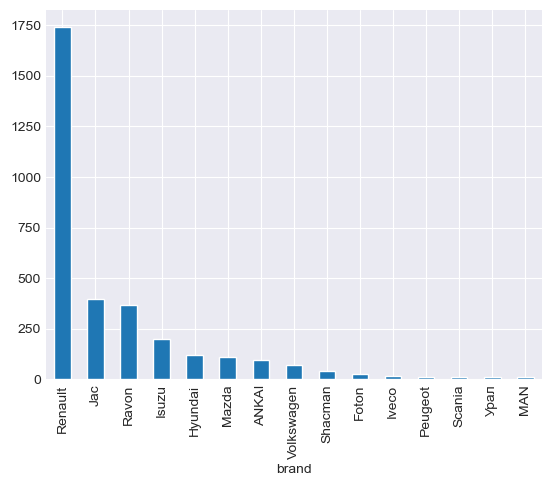

In [60]:
# выведем график топ-15 марок по числу пропусков в типе КПП
df[df.transmission_type.isna()].brand.value_counts().nlargest(15).plot(kind='bar')
plt.show()

Как и в случае с объёмом двигателя, в поле коробки передач больше всего пропусков у марки Рено.

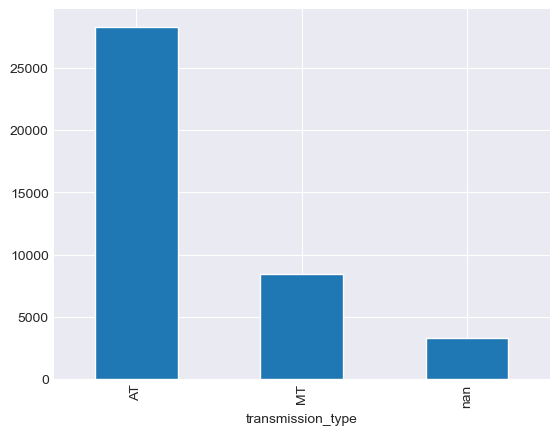

In [61]:
df.transmission_type.value_counts(dropna=False).plot(kind='bar')
plt.show()

В данных явно преобладают машины с автоматической коробкой. У разных марок в зависимости от комплектации могут быть разные типы КПП. Заполним пропуски значением "unknown".

In [62]:
df.transmission_type.fillna('unknown', inplace = True)

### Тип привода

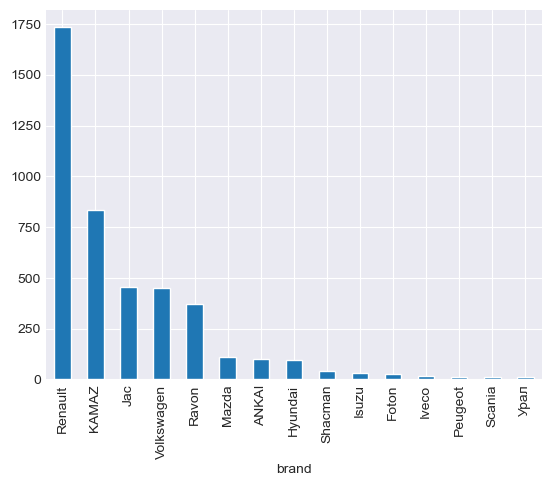

In [63]:
# выведем график топ-15 марок по числу пропусков в типе КПП
df[df.drive_type.isna()].brand.value_counts().nlargest(15).plot(kind='bar')
plt.show()

Для типа привода ситуация аналогичная. Можем сделать вывод, что компания-агрегатор плохо собирает данные по Рено и Камазу, либо детальная статистика по этим маркам отсутствует.

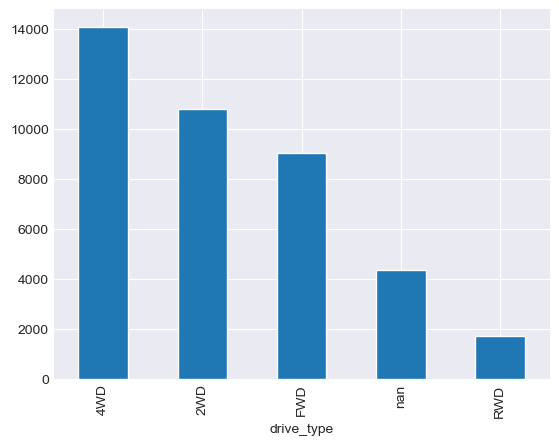

In [64]:
df.drive_type.value_counts(dropna=False).plot(kind='bar')
plt.show()

In [65]:
# укажем для всех пропусков значение 2WD
df.drive_type.fillna('2WD', inplace = True)

### Тип клиента

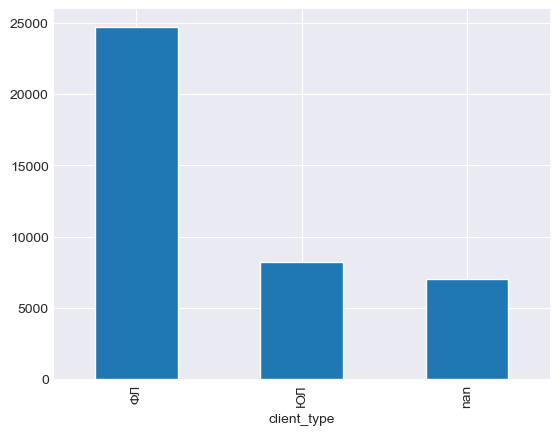

In [66]:
df.client_type.value_counts(dropna=False).plot(kind='bar')
plt.show()

Относительно пропусков в типе клиента заполним их основываясь на предоложениях:
- ФЛ покупают за раз не более двух машин,
- если машины относится к коммерческим, то её приобрело юр.лицо

In [67]:
# выделим диапазон значений для физ.лиц
individual = df.query('quantity <= 2  & client_type.isna() & segment_2013 != "Коммерческие автомобили"')

# заполним пропуски ФЛ
df.client_type.loc[individual.index] = df.client_type.loc[individual.index].fillna('ФЛ')

In [68]:
# Остальные пропуски заполним ЮЛ
df.client_type.fillna('ЮЛ', inplace = True)

### Количество

In [69]:
df[df.quantity.isna() == True]

,month,company,brand,model,modification,release_year,country,fuel_type,engine_volume,transmission_type,drive_type,client_type,quantity,price_usd,sell_price_usd,state,segment_2013,class_2013
16741,2019-08-01,БИПЭК АВТО,Kia,Sportage,NaN,2019,KAZ,F,2.00,AT,4WD,ЮЛ,NaN,20700.00,0.00,Карагандинская область,Внедорожники,Компактные SUV
17368,2019-08-01,БИПЭК АВТО,Lada,Granta,NaN,2019,KAZ,F,1.60,AT,FWD,ЮЛ,NaN,7100.00,0.00,г.Алматы,Легковые автомобили,B класс
18676,2019-08-01,БИПЭК АВТО,Lada,XRAY,NaN,2018,KAZ,F,1.60,MT,FWD,ЮЛ,NaN,13800.00,0.00,Павлодарская область,Легковые автомобили,B класс
37416,2019-08-01,БИПЭК АВТО,UAZ,3909,NaN,2018,KAZ,F,2.69,MT,4WD,ЮЛ,NaN,11200.00,0.00,г.Алматы,Коммерческие автомобили,Развозные автомобили
37727,2019-08-01,БИПЭК АВТО,UAZ,Patriot,NaN,2018,KAZ,F,2.69,MT,4WD,ЮЛ,NaN,13800.00,0.00,Восточно-Казахстанская область,Внедорожники,Среднеразмерные SUV
38775,2019-08-01,БИПЭК АВТО,Skoda,Kodiaq,NaN,2019,KAZ,F,2.00,AT,4WD,ЮЛ,NaN,40000.00,0.00,г.Нур-Султан,Внедорожники,Полноразмерные SUV


В столбце кол-во пропусков 6 штук, но также отсутвует информация об итоговой цене продажи, покупателе. Данные не восстановить, можем удалить эти строки.

In [70]:
df.dropna(subset = ['quantity'], axis = 0, inplace = True)
df.reset_index(drop = True, inplace=True)

Разделим объем двигателя на категории: до 1.2 — small, 1.2 - 1.8 — average, 1.8 - 3.5 — big, от 3.5 — huge. 

In [71]:
df.engine_volume.min(), df.engine_volume.max() 

(1.2, 26.7)

In [72]:
volume_labels = ['small', 'average', 'big', 'huge']
volume_bins = [0, 1.2, 1.8, 3.5, 26.7]

In [73]:
# создадим новые столбец с категориями 
df['volume_cat'] = pd.cut(df.engine_volume, bins=volume_bins, labels=volume_labels)

In [74]:
df.volume_cat.unique()

['average', 'big', 'huge', 'small']
Categories (4, object): ['small' < 'average' < 'big' < 'huge']

In [75]:
# проверим данные на дубликаты
df.duplicated().sum() / len(df)

0.5243993993993994

Из-за того, что предоставленные данные были обезличины, имеем большое количество явных дубликатов (52% записей). Обрабатывать их нет смысла.

In [77]:
# размерность очищенных данных
shape_clean = df.shape
print(f'Всего {shape_clean[0]} наблюдений и {shape_clean[1]} признаков')

Всего 39960 наблюдений и 19 признаков


После очистки данных у нас осталось 19 столбцов, удалили всего 6 записей.

In [78]:
# сохраним файл с очищенными данными, далее будем пользоваться им
#df.to_csv('auto_kz_2019_clean.csv', sep=';')

## EDA

In [2]:
df = pd.read_csv('auto_kz_2019_clean.csv', sep=';', index_col=0)

In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39960 entries, 0 to 39959
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   month              39960 non-null  object  
 1   company            39960 non-null  object  
 2   brand              39960 non-null  object  
 3   model              39960 non-null  object  
 4   modification       36375 non-null  object  
 5   release_year       39459 non-null  float64 
 6   country            39960 non-null  object  
 7   fuel_type          39960 non-null  category
 8   engine_volume      39960 non-null  float64 
 9   transmission_type  39960 non-null  category
 10  drive_type         39960 non-null  category
 11  client_type        39960 non-null  object  
 12  quantity           39960 non-null  float64 
 13  price_usd          39960 non-null  float64 
 14  sell_price_usd     39960 non-null  float64 
 15  state              39960 non-null  object  
 16  segment_2

In [3]:
df.describe()

,release_year,engine_volume,quantity,price_usd,sell_price_usd
count,39459.00,39960.00,39960.00,39960.00,39960.00
mean,2018.75,2.38,1.35,28251.73,33762.74
std,0.46,1.18,2.37,20006.41,50704.57
min,2011.00,1.20,-1.00,7100.00,-35588.25
25%,2019.00,1.60,1.00,15518.50,16623.53
50%,2019.00,2.00,1.00,24283.86,26248.96
75%,2019.00,2.70,1.00,32505.66,35000.00
max,2019.00,26.70,115.00,328510.97,3778206.26


Минимальный год выпуска авто - 2011, значит работаем с данными продаж, как новых автомобилей, так и подержанных.  
Минимум 75% всех автомобилей имеются объём двигателя не более 2.7л.  
В основном в Казахстане покупают по одной машине за раз, большие партии автомобилей редко встречаются.  
Средняя стомость автомобиля, составляет 28252 дол.США (или 1 млн 807 тыс.тенге, по курсу на сентябрь 2019).

In [4]:
# В столбце числа продаж имеется отрицательное значение, скорее всего это ошибка, исправим на 1.  
df[df.quantity == -1]
# домножим на -1 столбцы quantity и sell_price_usd
df.loc[df.quantity == -1, ['quantity', 'sell_price_usd']] *= -1

In [5]:
# переведём часть столбцов в категории
cat_col = ['fuel_type', 'transmission_type', 'drive_type', 'segment_2013', 'class_2013', 'volume_cat']

for col in cat_col:
        df[col] = df[col].astype('category')

### Инфо о дилерах

In [6]:
# оценим на кол-во основных игроков на рынке, кол-во марок автомобилей
df.company.nunique(), df.brand.nunique()

(33, 44)

In [7]:
# оценим кол-во марок, которые производятся в самой стране
print(df[df.country == 'KAZ'].brand.nunique())

20


In [8]:
# посмотрим на распределение кол-ва марок по дилерам
df.groupby('company')['brand'].nunique().sort_values(ascending=False)

company
Allur Auto                      7
БИПЭК АВТО                      5
СемАЗ                           4
Mercur Auto                     3
Вираж                           3
TERRA MOTORS                    2
Almaty Motors Premium           2
Автоцентр-Бавария               2
Nissan Manufacturing RUS        2
Astana Motors                   2
СВС-ТРАНС                       2
Eurasia Motor Premium           2
ТК КАМАЗ                        2
Toyota Motor Kazakhstan         2
Volkswagen Group Rus            1
ТОО "Eurasia Motor Zhaik"       1
Лифан Моторс Рус                1
Автомир-Центр                   1
Автомир ГК                      1
Автодом Motors KST              1
Scania Central Asia             1
Subaru Kazakhstan               1
Scandinavian Motors             1
Renault Россия                  1
Ravon Motors Kazakstan          1
MMC RUS                         1
MAN Truck & Bus Kazakhstan      1
Hyundai Com Trans Kazakhstan    1
Hino Motors                     1
Daewoo

In [9]:
# найдём информацию о самой крупной продаже по кол-ву машин
df.loc[df.quantity == df.quantity.max()]

,month,company,brand,model,modification,release_year,country,fuel_type,engine_volume,transmission_type,drive_type,client_type,quantity,price_usd,sell_price_usd,state,segment_2013,class_2013,volume_cat
16884,2019-05-01,БИПЭК АВТО,Lada,4x4,NaN,2019.00,KAZ,F,1.69,MT,4WD,ЮЛ,115.00,9000.00,1035000.00,Жамбылская область,Внедорожники,Субкомпактные SUV,average


In [10]:
# найдём информацию о самой крупной сделке
df.loc[df.sell_price_usd == df.sell_price_usd.max()]

,month,company,brand,model,modification,release_year,country,fuel_type,engine_volume,transmission_type,drive_type,client_type,quantity,price_usd,sell_price_usd,state,segment_2013,class_2013,volume_cat
39555,2019-07-01,Daewoo Bus Kazakhstan,Daewoo,BC 095,BC 095,2019.00,KAZ,D,2.50,MT,2WD,ЮЛ,50.00,75564.13,3778206.26,Восточно-Казахстанская область,Коммерческие автомобили,Большие автобусы,big


Всего на территории Кахастана работают 33 дилерских центра. На рынке предсталены 44 марки автомобилей, из них 20 марок произведены непосредственно в Казахстане.  
Больше всего марок продают компания Allur Auto - 7 и БИПЭК АВТО - 5, около половины всех дилеров продают только одну марку машин.  
Самый большой заказ выполнил автоцентр БИПЭК АВТО - 155 машин Лада 4х4 в Жабыльской области.  
Самый дорогой заказ был выполнен Daewoo Bus Kazakhstan: поставили 50 автобусов Daewoo BC 095 в Восточно-Казахстанскую область, сумма сделки - 3778206,26 дол. США.  

### Выбросы по объёму двигателя

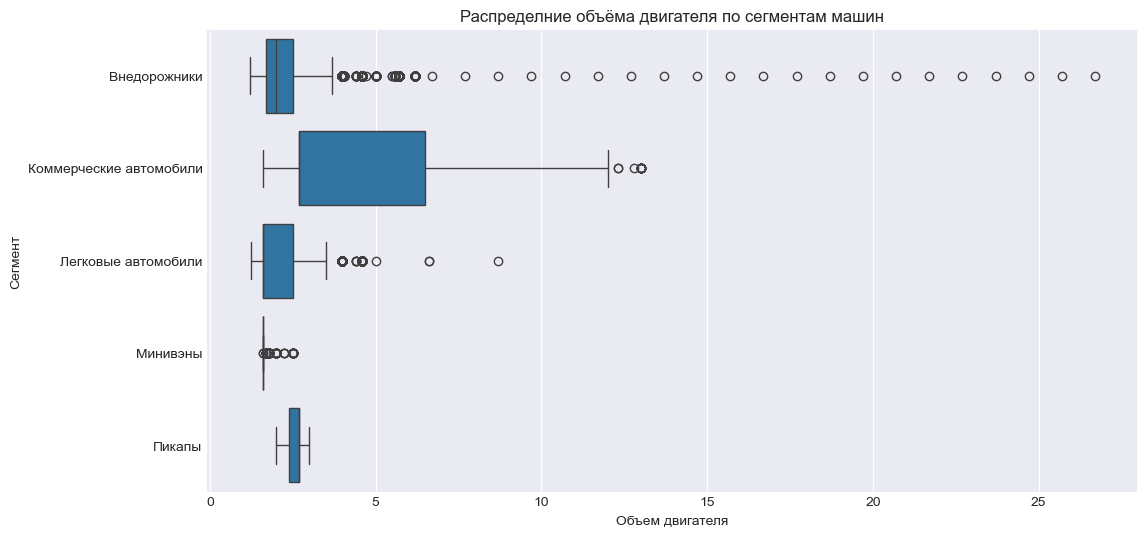

In [11]:
# Оценим распределение объёмов двигателей в разрезе сегментов

plt.figure(2, figsize=(12,6))
ax = sns.boxplot(data=df, x="engine_volume", y="segment_2013")
ax.set(title = 'Распределние объёма двигателя по сегментам машин', xlabel='Объем двигателя', ylabel='Сегмент')

plt.show()

На представленном графике видим, что у внедорожников имеются выбросы - двигатели свыше 4 литров, медианой для них является значение в районе 2л. Также есть выбросы у легковых машин: некоторые значения превышают 5 литров. У коммерческих автомобилей ситуация другая: есть очень низкие для этого сегмента литраж. Это может говорить об ошибках в данных.

У Chevrolet	Niva объём двигателя 1.7л (https://www.drom.ru/catalog/chevrolet/niva/g_2009_1658/), исправим это.

In [12]:
df.loc[(df.segment_2013 == "Внедорожники") & 
       (df.brand == "Chevrolet") & 
       (df.model == "Niva") & 
       (df.engine_volume != 1.7), 'engine_volume'] = 1.7

In [13]:
x = df.query('segment_2013 == "Внедорожники" &\
             engine_volume > 2  & engine_volume < 7').\
            groupby(['brand', 'model'])['engine_volume']
x.value_counts()

# Остальные модели выглядят нормально

brand       model    engine_volume
Audi        Q7       3.00              3
            Q8       3.00             20
BMW         X5       3.00             39
                     4.40              6
            X6       3.00             16
                                      ..
Volkswagen  Tiguan   2.03             26
            Touareg  3.00              4
                     2.73              3
Volvo       XC60     2.73              1
            XC90     4.06              1
Name: count, Length: 78, dtype: int64

In [14]:
# Также проверим легковые автомобили
df.query('segment_2013 == "Легковые автомобили"').engine_volume.min(), df.query('segment_2013 == "Легковые автомобили"').engine_volume.max() 

(1.248, 8.7)

In [15]:
x = df.query('segment_2013 == "Легковые автомобили" & engine_volume > 3').sort_values(by='engine_volume', ascending=False)
x.groupby(['brand', 'model'])['engine_volume'].value_counts()

brand          model      engine_volume
BMW            5 серия    4.40               2
               7 серия    6.60               2
                          4.40               1
               8 серия    4.40               1
Jaguar         XF         5.00               1
               XJ         3.49               1
Kia            Quoris     3.34               2
               Stinger    3.34               5
Lexus          ES         3.50              41
               LS         3.50              10
Mercedes-Benz  CLS-Class  4.00               2
               E-Class    4.00               2
               S-Class    4.00               3
Porsche        Panamera   4.00               3
Toyota         Camry      3.50             330
                          4.60              97
               Corolla    4.00             131
Volkswagen     Polo       8.70               1
Name: count, dtype: int64

Бросаются в глаза Тойта Камри 4.6л (максимум 3.5л), Королла 4л (максимум 1.8л) и Фолксваген Поло (максимум 1.6)

In [16]:
# Camry
df.loc[(df.segment_2013 == "Легковые автомобили") & (df.brand == "Toyota") & 
       (df.model == "Camry") & (df.engine_volume == 4.60), 'engine_volume'] = 3.5

#Corolla
df.loc[(df.segment_2013 == "Легковые автомобили") & (df.brand == "Toyota") & 
       (df.model == "Corolla") & (df.engine_volume == 4.00), 'engine_volume'] = 1.6

#Polo
df.loc[(df.segment_2013 == "Легковые автомобили") & (df.brand == "Volkswagen") & 
       (df.model == "Polo") & (df.engine_volume == 8.70), 'engine_volume'] = 1.6

In [17]:
# аналогично проверим коммерческие автомобили
print(df.query('segment_2013 == "Коммерческие автомобили"').engine_volume.min()) 
print(df.query('segment_2013 == "Коммерческие автомобили"').engine_volume.max())
# смущают слишком низкие значения объёма двигателя

1.6
13.0


In [18]:
x = df.query('segment_2013 == "Коммерческие автомобили" & engine_volume < 4').sort_values(by='engine_volume')
x.groupby(['brand', 'model'])['engine_volume'].value_counts()[30:]

brand          model               engine_volume
Hyundai        HD 78               3.90               4
Isuzu          NMR                 2.84              68
                                   3.00              16
               NPR                 2.84              20
               NPS                 2.84               1
Iveco          Daily               2.84              15
                                   3.00               1
               Daily A             2.65               2
               Daily V             2.68               1
               Tipper              2.84               4
Jac            N120                3.80              88
               N56                 2.70              46
                                   2.84              11
                                   3.80               2
               X200                2.84               2
KAMAZ          65111               2.84              12
Mercedes-Benz  Sprinter            2.20               8

У Daewoo - объем двигателя 7.6 - 11.1 л, , у KAMAZ 65111 - 11.76. Остальные модели в порядке.

In [19]:
df.loc[(df.brand == 'Daewoo') & (df.segment_2013 == "Коммерческие автомобили"), 'engine_volume'] = 7.6

df.loc[(df.brand == 'KAMAZ') & (df.segment_2013 == "Коммерческие автомобили") & 
       (df.engine_volume == 2.84), 'engine_volume'] = 11.76

### Локализация

In [20]:
# оценим распределение машин по странам-производителям
sales_by_country = df.groupby('country')[['quantity', 'sell_price_usd']].sum().reset_index()
sales_by_country.sort_values(by='quantity', ascending=False)

,country,quantity,sell_price_usd
8,KAZ,31367.00,569024857.09
12,RUS,14341.00,357192265.30
7,JPN,4612.00,255472253.15
15,TUR,1167.00,36631607.10
14,THA,981.00,31203618.60
17,USA,507.00,35348056.44
4,DEU,357.00,25961018.31
16,UK,206.00,18396273.93
3,CHN,94.00,2069946.58
18,UZB,83.00,2082834.78


Среди всех продаж лидируют машины со сборкой в Казахстане, затем следует Россия, на третьем месте - японские машины.

In [21]:
# оценим продажи по месту их осуществления
sales_by_state = df.groupby('state')[['quantity', 'sell_price_usd']].sum().reset_index()
sales_by_state.sort_values(by='quantity', ascending=False)

,state,quantity,sell_price_usd
16,г.Алматы,13947.00,426474005.34
17,г.Нур-Султан,10158.00,292675683.31
15,Южно-Казахстанская область,3749.00,81816963.53
3,Атырауская область,3395.00,74717533.10
8,Костанайская область,3305.00,88334490.44
7,Карагандинская область,2983.00,59959740.56
4,Восточно-Казахстанская область,2944.00,60444536.70
6,Западно-Казахстанская область,2180.00,45829901.28
10,Мангистауская область,2049.00,46727491.50
14,Экспорт область,1919.00,37882052.45


Больше всего продаж приходится на два крупнейших города: Алматы и Астану(44%).  
На десятом месте по продажам занимают экспортные сделки: 1919 сделок было выполнено зарубеж.  
Сравним продажи по регионам со средней зп в этих регионах.

In [22]:
# данные о средней зарплате по региона на 3 кв 2019
salary_dict = {
    'г.Алматы': 224158, 
    'г.Нур-Султан': 226796, 
    'Восточно-Казахстанская область': 162182,
    'Западно-Казахстанская область': 183914, 
    'Костанайская область': 145890,
    'Павлодарская область': 160670, 
    'Южно-Казахстанская область': 110254,
    'Мангистауская область': 294099, 
    'Атырауская область': 351103,
    'Актюбинская область': 156595, 
    'Карагандинская область': 172239,
    'Северо-Казахстанская область': 130233, 
    'Акмолинская область': 140272,
    'Кызылординская область': 152085, 
    'Жамбылская область': 127043,
    'Туркестанская область': 123853, 
    'Алматинская область': 136212
}

kz_salary_2019 = pd.DataFrame(salary_dict.items(), columns =['state', 'salary'])

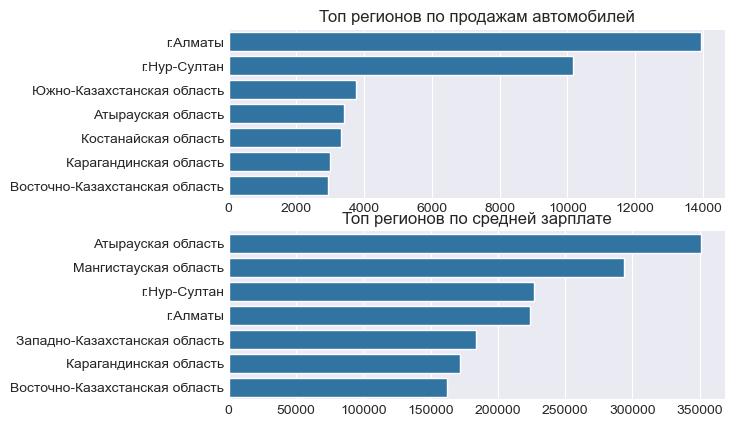

<Figure size 1300x1000 with 0 Axes>

In [53]:
# объединим информацию в одну таблицу
kz_stat = sales_by_state.merge(kz_salary_2019, how='inner', left_on='state', right_on = 'state')

# построим графики
x1 = kz_stat.nlargest(7, 'quantity').quantity
y1 = kz_stat.nlargest(7, 'quantity').state

x2 = kz_stat.nlargest(7, 'salary').salary
y2 = kz_stat.nlargest(7, 'salary').state

fig, axs = plt.subplots(nrows = 2)
plt.figure(2, figsize=(13,10))

ax1 = sns.barplot(kz_stat, x=x1, y=y1, ax=axs[0])
ax1.set(title = 'Топ регионов по продажам автомобилей', xlabel='', ylabel='')
ax2 = sns.barplot(kz_stat, x=x2, y=y2, ax=axs[1])
ax2.set(title = 'Топ регионов по средней зарплате', xlabel='', ylabel='')

plt.show()

Как видно из графиков выше, из топ-7 регионов 5 попадают в оба топа. При этом, не смотря на то что больше всего машин было куплено в Алмате и Астане, по уровню ЗП они занимают только 3 и 4 место. Можно предположить, что люди, которые работают в промышленноразвитых регионах, приезжают в крупные города, где выбор автомобилей больше.


In [57]:
df.columns

Index(['month', 'company', 'brand', 'model', 'modification', 'release_year',
       'country', 'fuel_type', 'engine_volume', 'transmission_type',
       'drive_type', 'client_type', 'quantity', 'price_usd', 'sell_price_usd',
       'state', 'segment_2013', 'class_2013', 'volume_cat'],
      dtype='object')

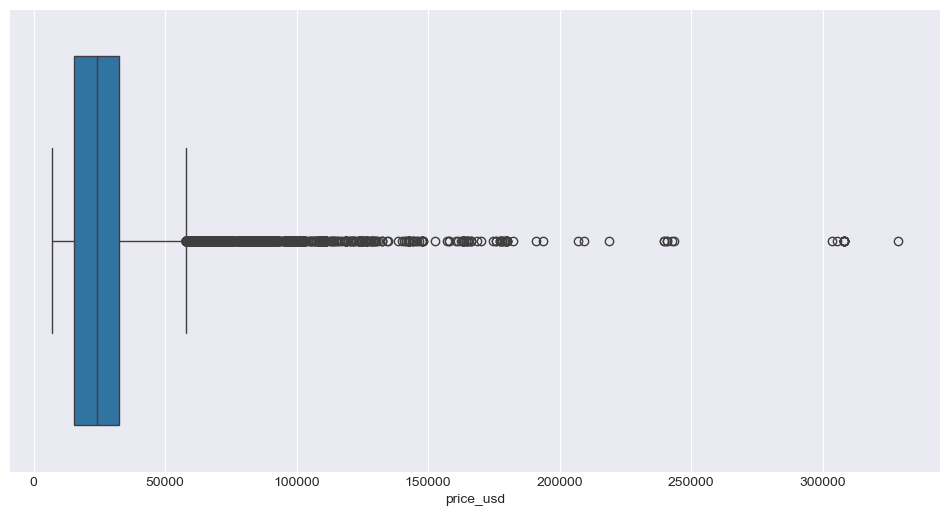

In [62]:
# пострим график распределния цен
plt.figure(2, figsize=(12,6))
ax = sns.boxplot(x = df.price_usd)

plt.show()

Видим, что основной диапазон цен находится в пределах 15 тыс.дол и 35 тыс. дол. Цены свыше 60 тыс. можно считать выбросами.

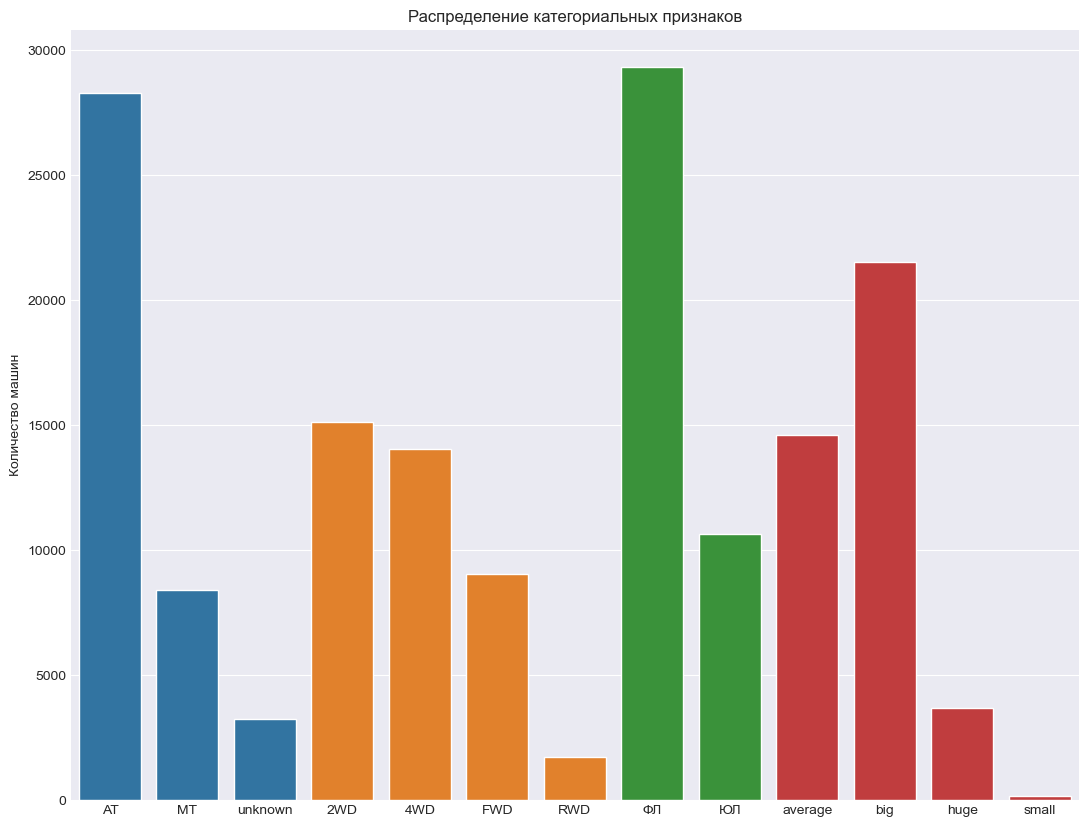

In [91]:
# посмотрим на распределения автомобилей по категориальным признакам
plt.figure(2, figsize=(13,10))

ax1 = sns.barplot(df.transmission_type.value_counts())
ax2 = sns.barplot(df.drive_type.value_counts())
ax3 = sns.barplot(df.client_type.value_counts())
ax4 = sns.barplot(df.volume_cat.value_counts())

ax1.set(title = 'Распределение категориальных признаков', xlabel='', ylabel='Количество машин')

plt.show()

## Исследование рынка автомобилей Казахстана

### Ёмкость рынка

По данным заказчика, в 4м квартале в среднем осуществляется от 30 до 50% всех продаж автомобилей. Можем рассчитать потенциальную ёмкость рынка за весь 2019 год. Возьмём продажи по верхн

In [453]:
# посмотрим на ёмкость рынка с учётом 40% прироста в 4 квартале
market_volume_total = int((market_volume.quantity.sum()).round())
market_volume_total_usd = (market_volume.sell_price_usd.sum()).round(2)

print(f"Фактическая ёмкость рынка за 9 месяцев 2019 года \
составляет {market_volume_total} единиц, общая выручка — {(market_volume_total_usd / 1000000).round(2)} млн.дол.")
print(f"Потенциальная ёмкость рынка в 2019 году составит \
{int(market_volume_total*1.4)} штук, потенциальная выручка — {(market_volume_total_usd * 1.4 / 1000000).round(2)} млн.дол.")

Фактическая ёмкость рынка за 9 месяцев 2019 года составляет 53876 единиц, общая выручка — 1349.23 млн.дол.
Потенциальная ёмкость рынка в 2019 году составит 75426 штук, потенциальная выручка — 1888.92 млн.дол.


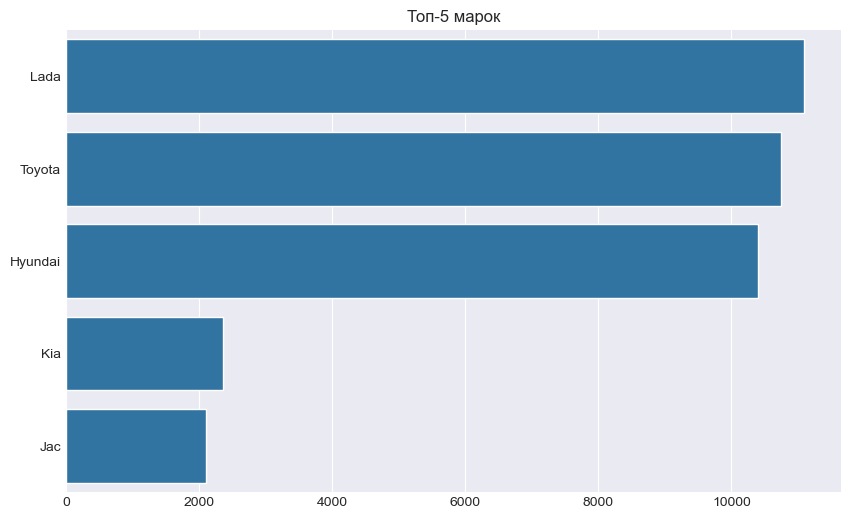

In [159]:
# выведем топ марок по объёму продаж и сумме
top_5_brands = df.groupby('brand')[['quantity', 'sell_price_usd']].sum().nlargest(5, 'quantity')
top_5_brands
# построим график

plt.figure(figsize=(10,6))

ax = sns.barplot(y = top_5_brands.index, x = top_5_brands.quantity)
ax.set(title = 'Топ-5 марок', xlabel='', ylabel='')

plt.show()

<Figure size 2000x2000 with 0 Axes>

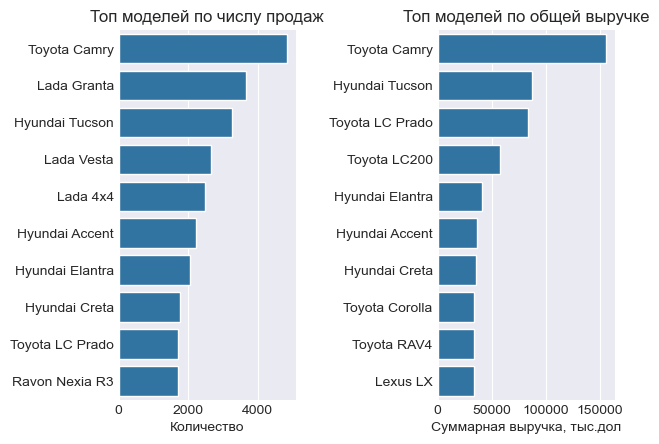

In [161]:
# выведем топ моделей 
df['full_names'] = df.brand +' '+ df.model
top_10_models = df.groupby('full_names')[['quantity', 'sell_price_usd']].sum()
# поменяем выручку на тыс.дол
top_10_models['sell_price_usd'] = (top_10_models['sell_price_usd']/1000).round(2)

# построим график
x1 = top_10_models.sort_values(by='quantity', ascending=False).quantity[:10]
x2 = top_10_models.sort_values(by='sell_price_usd', ascending=False).sell_price_usd[:10]

plt.figure(figsize=(20,20))
fig, axs = plt.subplots(ncols = 2)

ax1 = sns.barplot(x = x1, y = x1.index, ax=axs[0])
ax1.set(title = 'Топ моделей по числу продаж', xlabel='Количество', ylabel='')
ax2 = sns.barplot(x = x2, y = x2.index, ax=axs[1])
ax2.set(title = 'Топ моделей по общей выручке', xlabel='Суммарная выручка, тыс.дол', ylabel='')

plt.subplots_adjust(wspace = 0.8)
plt.show()

В топ-5 моделей по числу продаж попали три модели Лады, при этом выручка по ним не попадает и в топ-10. По выруке больше всего принесли продажи Тойоты и Хёнде.

In [144]:
# определим объём рынка автомобилей в разрезе сегментов автомобилей
segment_volume = df.groupby('segment_2013')[['quantity', 'sell_price_usd']].sum()
segment_volume

,quantity,sell_price_usd
segment_2013,,
Внедорожники,21994.00,663991129.53
Коммерческие автомобили,5246.00,185811934.25
Легковые автомобили,23836.00,447640813.35
Минивэны,1824.00,22764626.27
Пикапы,976.00,29021641.16


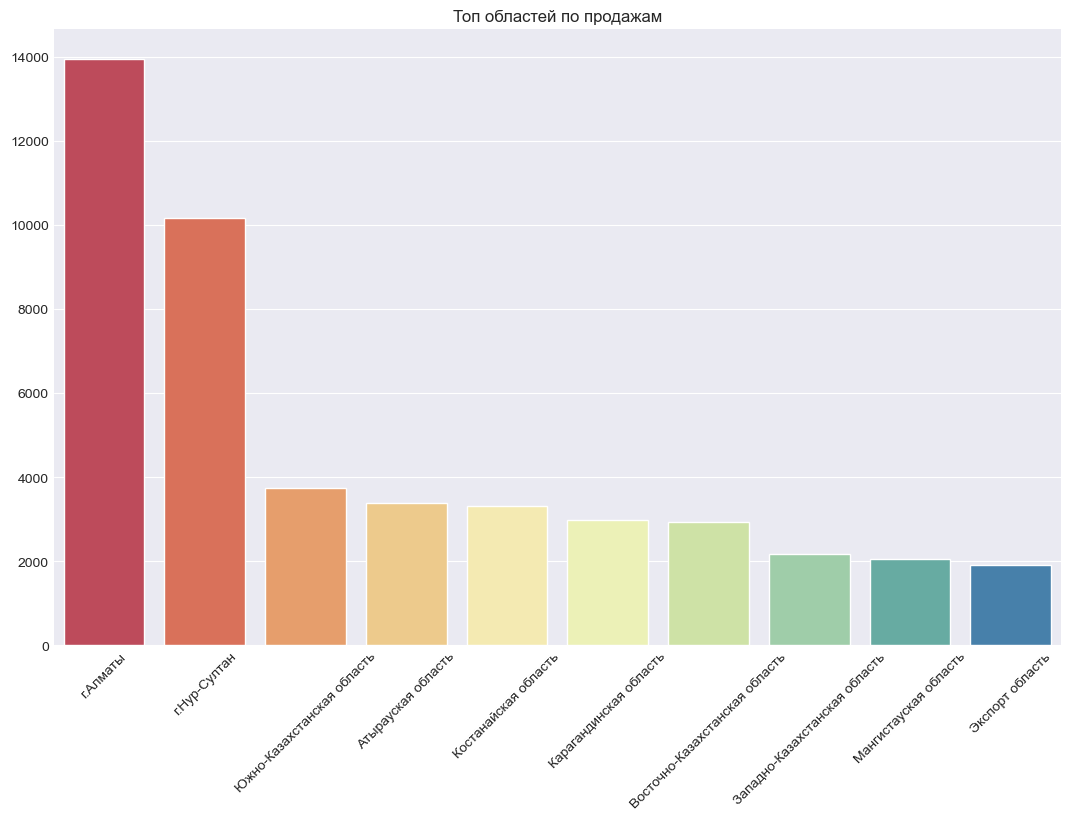

In [220]:
# продажи по регионам
sales_by_state = df.groupby('state')['quantity'].sum().nlargest(10)

# график
plt.figure(figsize=(13,8))

sns.barplot(sales_by_state, palette="Spectral")
plt.xticks(rotation=45)
plt.title('Топ областей по продажам')
plt.xlabel('')
plt.ylabel('')

plt.show()

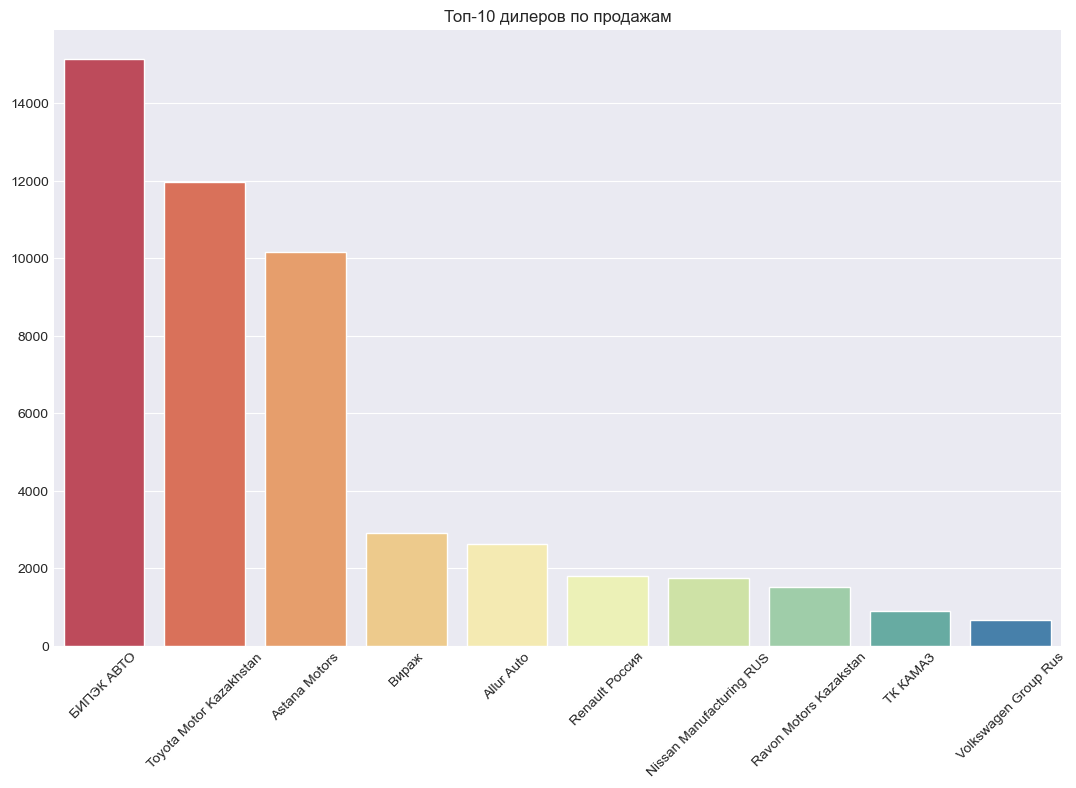

In [219]:
# продажи автоцентров
company_sales = df.groupby('company')['quantity'].sum().nlargest(10)
# график
plt.figure(figsize=(13,8))

sns.barplot(company_sales, palette="Spectral")
plt.xticks(rotation=45)
plt.title('Топ-10 дилеров по продажам')
plt.xlabel('')
plt.ylabel('')

plt.show()

### Динамика продаж

<Figure size 1500x600 with 0 Axes>

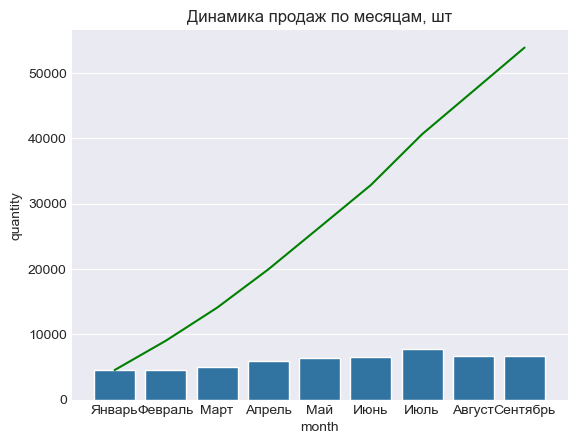

In [186]:
# Проанализируем общую динамику продаж по месяцам
monthly_sales = df.groupby('month')[['quantity', 'sell_price_usd']].sum().reset_index()
monthly_sales['quantity_cum'] = monthly_sales.quantity.cumsum()
monthly_sales['cumsum_usd'] = monthly_sales.sell_price_usd.cumsum()

# построим графики
plt.figure(figsize=(15, 6))
plt.subplots()

sns.barplot(monthly_sales, x = monthly_sales.month.dt.month_name(locale='ru_Ru'), y = 'quantity')
sns.lineplot(monthly_sales, x = monthly_sales.month.dt.month_name(locale='ru_Ru'), y = 'quantity_cum', c = 'g')
plt.title('Динамика продаж по месяцам, шт')

plt.show()

In [151]:
# посмотрим на динамику продаж для коммерческих и некоммерческих автомобилей
com_cars = df.query('segment_2013 == "Коммерческие автомобили"')[['month', 'brand', 'quantity', 'sell_price_usd']]
private_cars = df.query('segment_2013 != "Коммерческие автомобили"')[['month', 'brand', 'quantity', 'sell_price_usd']]

,month,brand,quantity,sell_price_usd
0,2019-05-01,Audi,1.00,28115.00
1,2019-08-01,Audi,1.00,32246.99
2,2019-04-01,Audi,1.00,32000.00
3,2019-07-01,Audi,1.00,31929.00
4,2019-07-01,Audi,1.00,31929.00
...,...,...,...,...
39940,2019-09-01,Renault,1.00,20889.18
39941,2019-09-01,Renault,1.00,21275.77
39942,2019-01-01,Volvo,1.00,59199.85
39943,2019-04-01,Volvo,1.00,56646.48


In [108]:
# определим объём рынка автомобилей в разрезе сегментов

(53876.0, 1349230144.56)

### RFM-анализ моделей авто (показатели Frequency и Monetary)

# Комментарий

**Не хватает времени всё доделать и причесать, отправляю пока что есть :(**